In [1]:
from ResearchMain import *

In [41]:
df = all_df[['S-Size-d(0.1)', 'S-Size-d(0.5)', 'S-Size-d(0.9)', 'S-Size-d((0.9-0.1)/0.5)', 'Period', 'River']]
df = df.melt(['Period', 'River'])
# df

In [42]:
#  过滤异常值
filter_threshold = {
    0.1: (0, 50),
    0.5: (20, 300),
    0.9: (60, 500)
}

for pra_size, value in filter_threshold.items():
    for row in df.iterrows():
        if row[1]['variable'] == f'S-Size-d({pra_size})' and (row[1]['value'] < value[0] or row[1]['value'] > value[1]):
            # print(row[0], pra_size, row[1]['value'])
            df.drop(labels=row[0], inplace=True)

        if row[1]['variable'] == 'S-Size-d((0.9-0.1)/0.5)' and (
                row[1]['value'] < 1 or row[1]['value'] > 5):
            df.drop(labels=row[0], inplace=True)

# df

In [43]:
# df.groupby(['Period', 'River', 'variable']).agg('mean')
# df[df['variable'] == 'S-Size-d((0.9-0.1)/0.5)']

In [16]:
plot_class = df['variable'].unique().tolist()  # 子图分类

In [11]:
plot_class

['S-Size-d(0.1)', 'S-Size-d(0.5)', 'S-Size-d(0.9)', 'S-Size-d((0.9-0.1)/0.5)']

<Figure size 1800x1200 with 0 Axes>

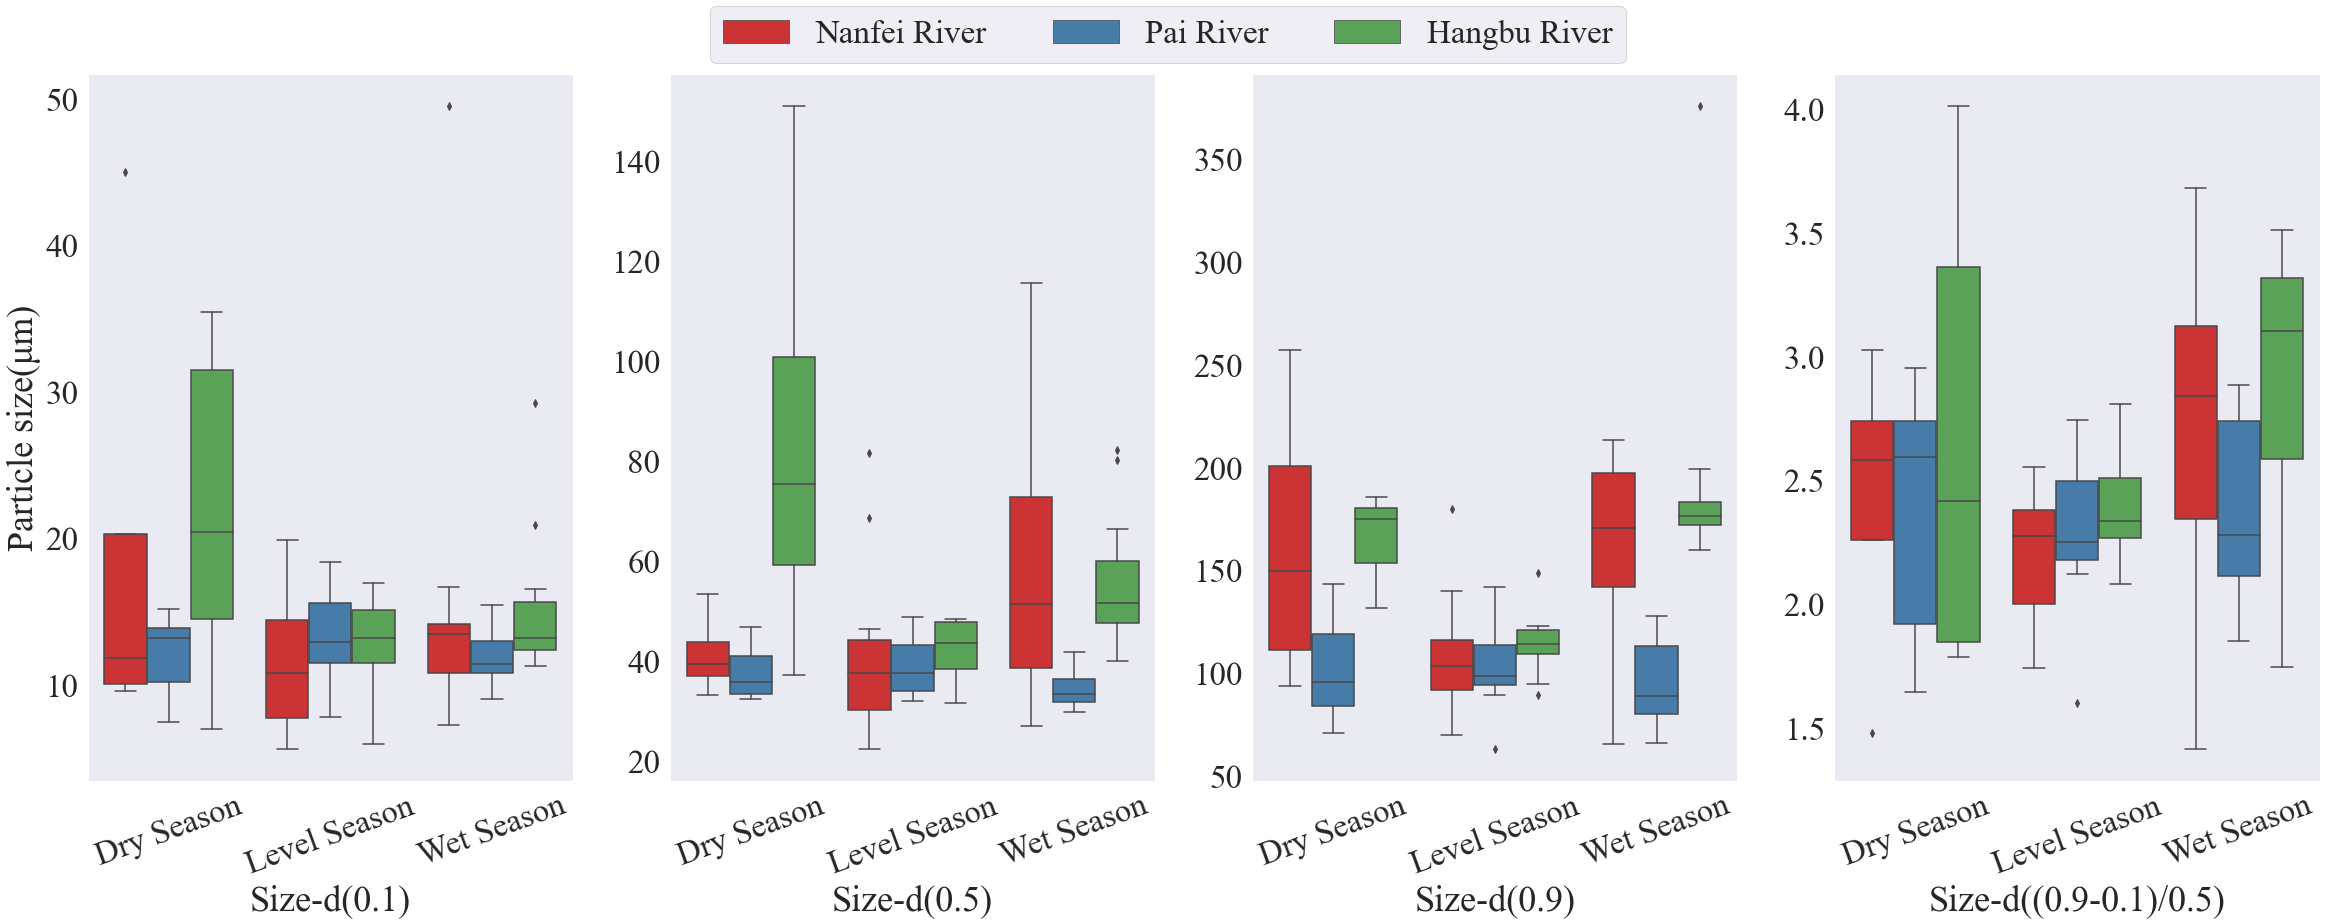

In [46]:
# 绘图全局设置
sns.set(
    style='dark',
    font='Times New Roman',
    font_scale=3
)

plt.figure(dpi=DPI)
fig, ax_arr = plt.subplots(1, len(plot_class), sharex='col', figsize=(40, 13))  # sharex、y设置子图共享x、y轴坐标
fig.subplots_adjust(hspace=0.2)  # 设置子图的横纵间距

for index, ax in enumerate(ax_arr):
    item = sns.boxplot(
        x="Period",
        y="value",
        hue="River",
        data=df[df['variable'] == plot_class[index]],
        palette="Set1",  # 颜色版
        # notch=True,  # 加入缺口
        ax=ax_arr[index]
    )
    #
    ax.tick_params(axis='x', rotation=20)
    # 删除子图的图例
    item.get_legend().remove()
    # 设置子图x轴名称
    item.set_xlabel(f'{plot_class[index][2:]}')
    # 设置子图y轴名称，只保留最后一个子图的轴名称，其余删除
    if index != 0:
        item.set_ylabel(None)
    else:
        item.set_ylabel('Particle size(μm)')

# 添加图例
lines, labels = fig.axes[-1].get_legend_handles_labels()  # 三个子图的图例相同，获取最后一个子图的图例
fig.legend(lines, labels, ncol=3, loc='upper center', bbox_to_anchor=(0.5, 0.97))
# 保存
plt.savefig(EXPORT_PATH + '粒径等级分布图' + IMG_TYPE, dpi=DPI, bbox_inches='tight')